In [38]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import re
import pandas as pd
import os
import requests
import dateutil
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option("display.max_rows", 300)

today=str(datetime.today().strftime("%Y-%m-%d"))

# Comparing with immigration data

In [29]:
immigration = pd.read_csv("data/migr_asyappctza-2018-02-14/migr_asyappctza_1_Data.csv", encoding = "latin-1")
immigration.head()

,TIME,CITIZEN,GEO,SEX,AGE,ASYL_APP,UNIT,Value,Flag and Footnotes
0,2012,Extra-EU28,European Union (28 countries),Total,Total,Asylum applicant,Person,"335,290",NaN
1,2012,Angola,European Union (28 countries),Total,Total,Asylum applicant,Person,"1,465",NaN
2,2012,Cameroon,European Union (28 countries),Total,Total,Asylum applicant,Person,"1,685",NaN
3,2012,Central African Republic,European Union (28 countries),Total,Total,Asylum applicant,Person,110,NaN
4,2012,Chad,European Union (28 countries),Total,Total,Asylum applicant,Person,460,NaN


In [30]:
def int_conversion(value_str):
    try:
        value=int(value_str.replace(",",""))
        return value
    except:
        pass

In [31]:
#converting number into an actual number format
immigration['number_asylum_applicants'] = immigration['Value'].apply(int_conversion)

#selecting only the relevant colums
immigration = immigration[['TIME','CITIZEN', 'number_asylum_applicants']]

In [32]:
immigration.head()

,TIME,CITIZEN,number_asylum_applicants
0,2012,Extra-EU28,335290
1,2012,Angola,1465
2,2012,Cameroon,1685
3,2012,Central African Republic,110
4,2012,Chad,460


In [33]:
# summing up the applicants from 2012 to 2016
# for each country
# and as an aggregate of all African countries (equals !=Extra-EU28)

duplicate_list = []

for country in immigration['CITIZEN']:
    duplicate_list.append(country)
    
origin_country_list = set(duplicate_list)

origin_countries = []

for country in origin_country_list:
    applicants_dict = {}
    applicants_dict['origin'] = country
    applicants_dict['applicants'] = immigration[immigration['CITIZEN']==country]['number_asylum_applicants'].sum()
    origin_countries.append(applicants_dict)

applicant_origin_countries = pd.DataFrame(origin_countries)
applicant_origin_countries.sort_values(by="applicants", ascending = False)

,applicants,origin
49,3977075,Extra-EU28
17,126430,Eritrea
36,118275,Nigeria
4,88390,Somalia
22,45015,"Gambia, The"
32,40130,Mali
10,38815,Algeria
5,38655,Guinea
8,36080,Democratic Republic of the Congo
33,34635,Sudan


In [34]:
extra_eu_applicants = applicant_origin_countries[applicant_origin_countries['origin'] == "Extra-EU28"]['applicants'].sum()
african_applicants = applicant_origin_countries[applicant_origin_countries['origin'] != "Extra-EU28"]['applicants'].sum()

print("Number of applicants from outside the EU (sum 2012 to 2016):",extra_eu_applicants)
print("Number of applicants from Africa (sum 2012 to 2016):", african_applicants)
print("Share of African applicants in all applicants", african_applicants/extra_eu_applicants*100)

Number of applicants from outside the EU (sum 2012 to 2016): 3977075
Number of applicants from Africa (sum 2012 to 2016): 838380
Share of African applicants in all applicants 21.0803165643


In [40]:
applicant_origin_countries[applicant_origin_countries['origin'] != "Extra-EU28"].to_csv("data/applicants_origin_countries-"+today+".csv")

In [35]:
immigration.head()

,TIME,CITIZEN,number_asylum_applicants
0,2012,Extra-EU28,335290
1,2012,Angola,1465
2,2012,Cameroon,1685
3,2012,Central African Republic,110
4,2012,Chad,460


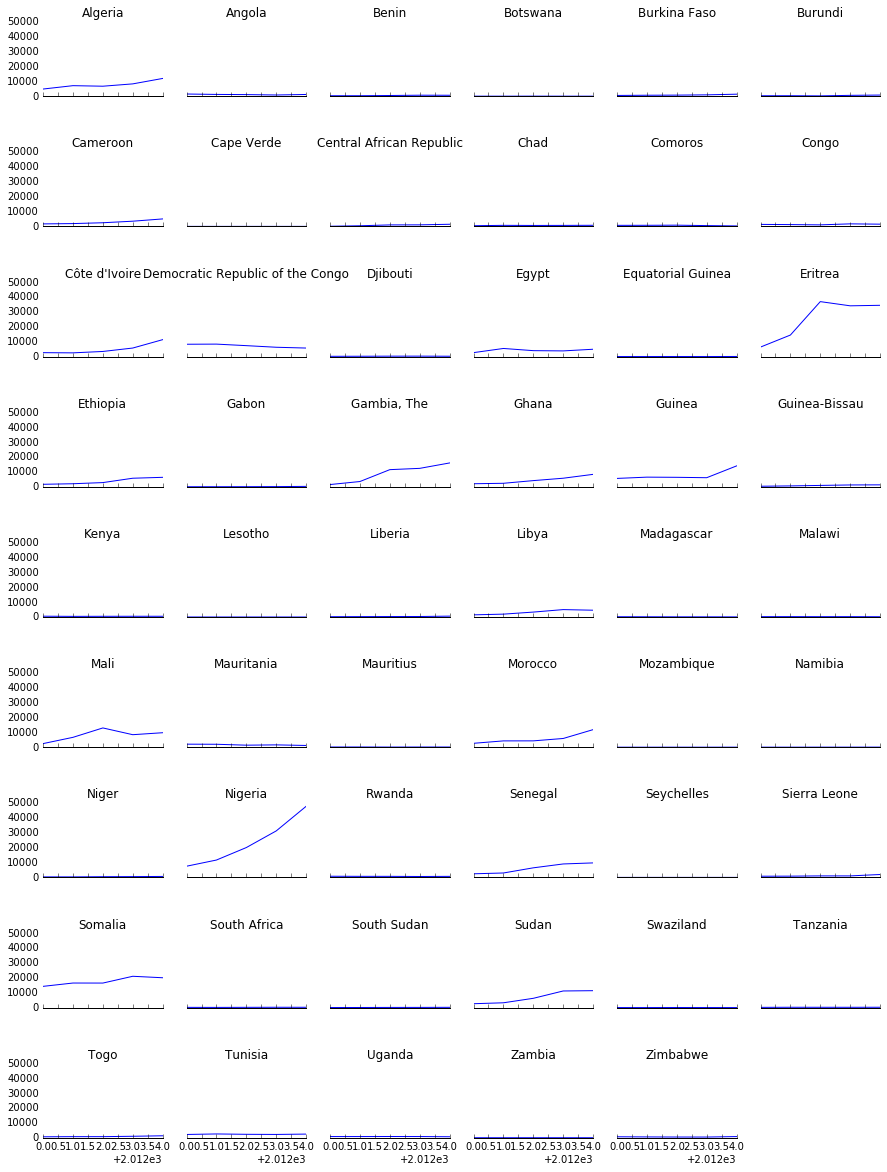

In [41]:
df=immigration[immigration['CITIZEN']!="Extra-EU28"].copy()
fig, axes = plt.subplots(nrows=9, ncols=6, sharex=True, sharey=True, figsize=(15,20))
axes_list = [item for sublist in axes for item in sublist]

countries = ['Algeria',
 'Angola',
 'Benin',
 'Botswana',
 'Burkina Faso',
 'Burundi',
 'Cameroon',
 'Cape Verde',
 'Central African Republic',
 'Chad',
 'Comoros',
 'Congo',
 "Côte d'Ivoire",
 'Democratic Republic of the Congo',
 'Djibouti',
 'Egypt',
 'Equatorial Guinea',
 'Eritrea',
 'Ethiopia',
 'Gabon',
 'Gambia, The',
 'Ghana',
 'Guinea',
 'Guinea-Bissau',
 'Kenya',
 'Lesotho',
 'Liberia',
 'Libya',
 'Madagascar',
 'Malawi',
 'Mali',
 'Mauritania',
 'Mauritius',
 'Morocco',
 'Mozambique',
 'Namibia',
 'Nicaragua',
 'Niger',
 'Nigeria',
 'Rwanda',
 'Senegal',
 'Seychelles',
 'Sierra Leone',
 'Somalia',
 'South Africa',
 'South Sudan',
 'Sudan',
 'Swaziland',
 'Tanzania',
 'Togo',
 'Tunisia',
 'Uganda',
 'Zambia',
 'Zimbabwe']

subset_df = df[df['CITIZEN'].isin(countries)]

for countryname, selection in subset_df.groupby('CITIZEN'):
    ax = axes_list.pop(0)
    selection.plot(x='TIME', y='number_asylum_applicants', label=countryname, ax=ax, legend=False)
    ax.set_title(countryname)
    ax.tick_params(
        which='minor',
        bottom='off',
        left='off',
        right='off',
        top='off'
    )
    ax.tick_params(
        which='major',
        bottom='on',
        left='off',
        right='off',
        top='off'
    )
    #ax.grid(linewidth=0.25)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel("")

for ax in axes_list:
    ax.remove()
    
plt.subplots_adjust(hspace=0.75)